In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

In [4]:
X.shape

(1000, 2)

In [5]:
y.shape

(1000,)

In [6]:
circles = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1], 'label':y})

In [7]:
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


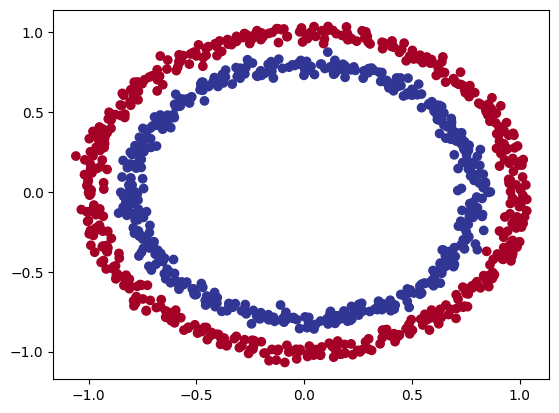

In [8]:
plt.scatter(X[:,0],X[:,1], c=y , cmap=plt.cm.RdYlBu)

In [9]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

model.fit(X,y,epochs=100, verbose=0)

In [10]:
model.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9970


[0.18545708060264587, 0.996999979019165]

In [11]:
def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


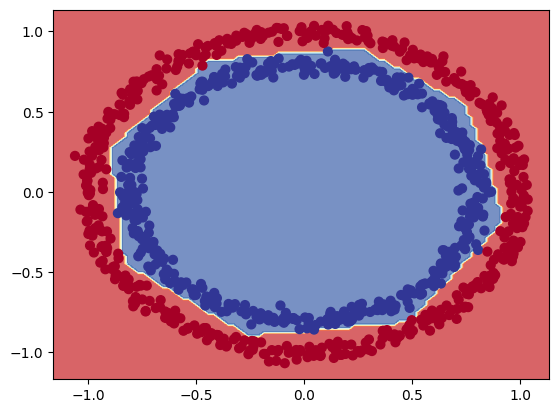

In [12]:
plot_decision_boundary(model, X, y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [14]:
X[0].shape

(2,)

In [15]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history  = model_1.fit(X_train,y_train, epochs=25, verbose=1)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6954 - accuracy: 0.4900
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5225
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5612
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.5738
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5500
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.6075
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.6363
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.6450
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.6725
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5802 - accuracy: 0.6963
Epoch 11/25
25/25 [

In [16]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (32, 4)                   12        
                                                                 
 dense_4 (Dense)             (32, 4)                   20        
                                                                 
 dense_5 (Dense)             (32, 1)                   5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model_1.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.1279 - accuracy: 0.9750


[0.12785309553146362, 0.9750000238418579]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


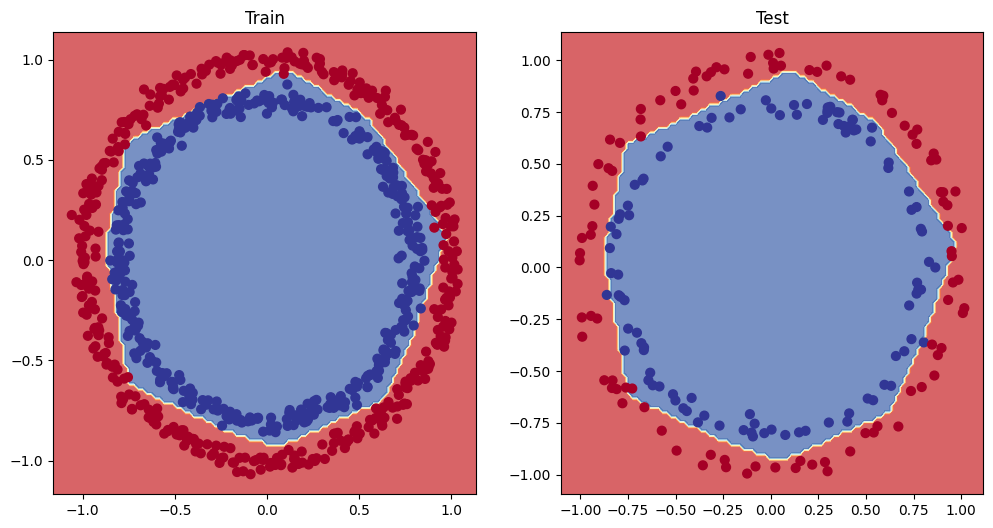

In [18]:

# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X=X_test, y=y_test)
plt.show()

In [19]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.695374,0.49000
1,0.688200,0.52250
2,0.681669,0.56125
3,0.676978,0.57375
4,0.668090,0.55000
5,0.657175,0.60750
6,0.645707,0.63625
7,0.627175,0.64500
8,0.606740,0.67250
9,0.580225,0.69625


Text(0.5, 0, 'epochs')

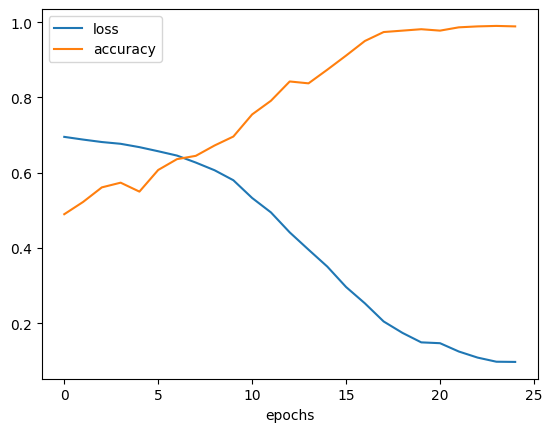

In [20]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')

In [21]:
# Define a learning rate scheduler function


# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

scheduler = lambda epoch : 1e-4 * 10**(epoch/20)

# Define the learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Train the model
history_2 = model_2.fit(X_train, y_train, epochs=100, verbose=1, callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6966 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5025 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4975 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.4975 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4925 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

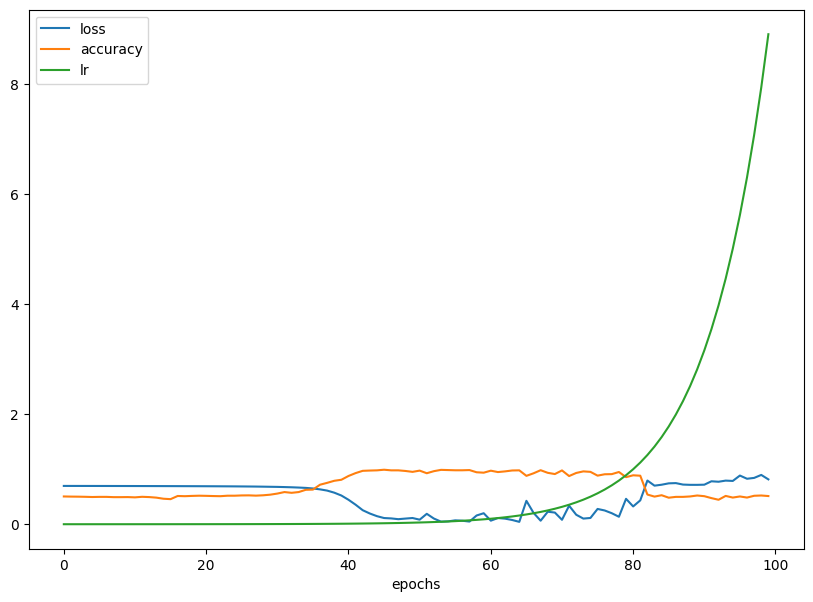

In [22]:
pd.DataFrame(history_2.history).plot(figsize=(10,7),xlabel='epochs')

Text(0.5, 1.0, 'Learning Rate vs. loss')

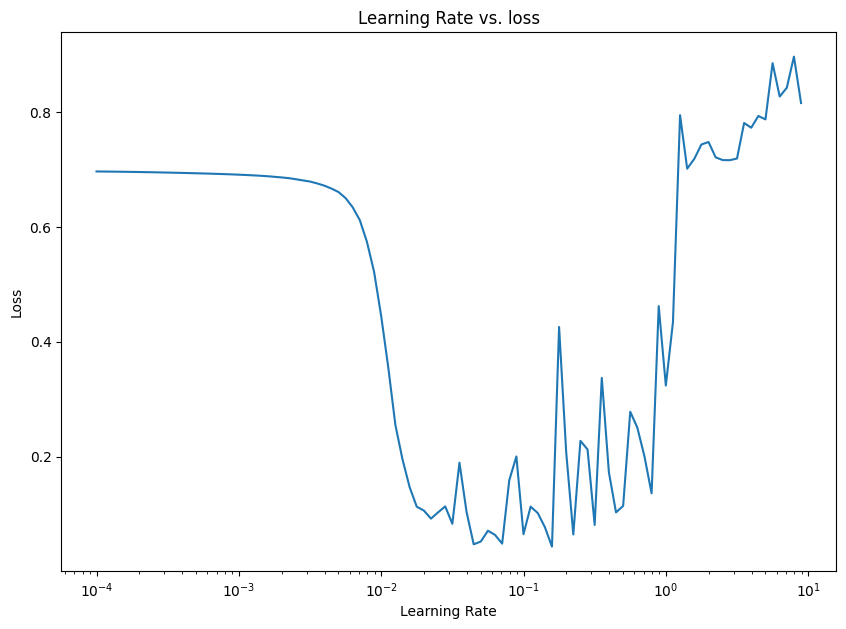

In [23]:
lrs = 1e-4 * (10**(np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_2.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs. loss')

In [24]:
# Ideal Learning Rate Approx.
(10**-2)*2

0.02

In [25]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])


# Train the model
history_3 = model_3.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6959 - accuracy: 0.4675
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4787
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5088
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5600
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.5600
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.6725
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.8425
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4428 - accuracy: 0.9450
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.9613
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2629 - accuracy: 0.9850
Epoch 11/20
25/25 [

In [26]:
model_3.evaluate(X_test,y_test)  # but lr 0.01 doing pretty good tha 0.02

7/7 [==============================] - 0s 4ms/step - loss: 0.0760 - accuracy: 0.9800


[0.07598448544740677, 0.9800000190734863]

In [27]:
y_preds = model_3.predict(X_test)

7/7 [==============================] - 0s 4ms/step


In [28]:
y_preds

array([[9.5539397e-01],
       [2.5632202e-03],
       [9.6518254e-01],
       [9.2582023e-03],
       [7.7149624e-01],
       [6.8374473e-01],
       [1.1522664e-03],
       [6.8519020e-04],
       [9.6518254e-01],
       [9.7258331e-04],
       [9.0028234e-02],
       [9.6518254e-01],
       [4.2843497e-03],
       [8.8817215e-01],
       [1.4619099e-01],
       [9.6518254e-01],
       [9.6518254e-01],
       [4.2920983e-03],
       [9.0957111e-01],
       [1.2607603e-01],
       [5.9016171e-04],
       [3.3494495e-04],
       [9.6135890e-01],
       [1.3755588e-03],
       [5.1941015e-03],
       [4.3917142e-02],
       [3.3872745e-03],
       [5.0526626e-02],
       [1.9581944e-03],
       [9.6518254e-01],
       [9.0158027e-01],
       [4.9742060e-03],
       [6.7648590e-02],
       [9.6518254e-01],
       [7.2715986e-03],
       [9.5769483e-01],
       [8.3584327e-01],
       [8.9830965e-01],
       [9.5398206e-01],
       [9.6518254e-01],
       [9.4939482e-01],
       [9.651825

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

confusion_matrix(y_test, tf.round(y_preds))


array([[99,  1],
       [ 3, 97]])

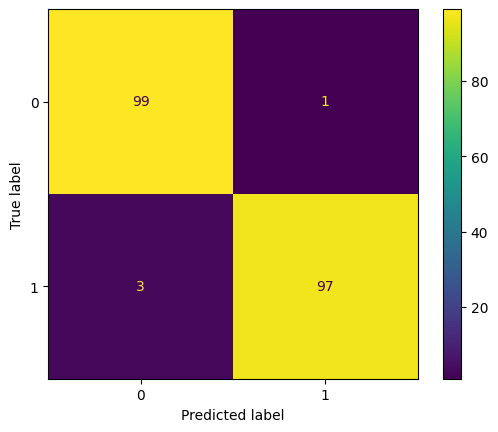

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, tf.round(y_preds)))
disp.plot()

In [31]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [32]:
train_data[0].shape

(28, 28)

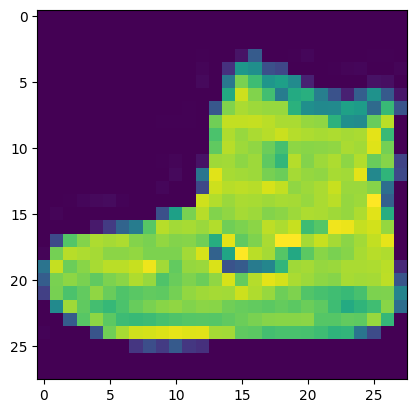

In [33]:
plt.imshow(train_data[0])

In [34]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'T-shirt/top')

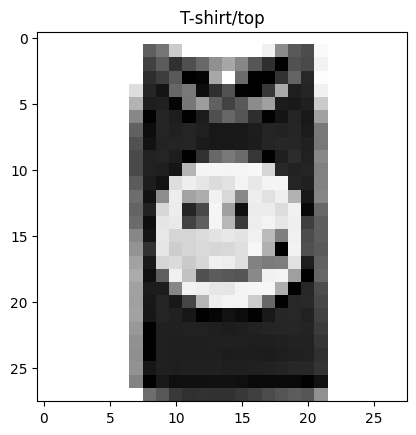

In [35]:
index = 101
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[y_train[index]])

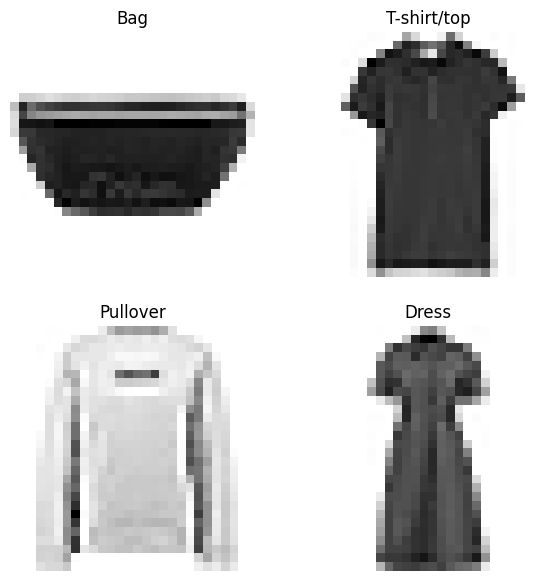

In [36]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [37]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [38]:
train_data[0].shape

(28, 28)

In [39]:
len(np.unique(np.array(train_labels)))

10

In [40]:
#CategoricalCrossentropy() --> need one hot-encoding of labels
#SparseCategoricalCrossentropy() --> no need one hot encoding

tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data,test_labels))


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4257 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [41]:
model_11.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
train_data.shape

(60000, 28, 28)

In [43]:
reshaped_train_data = tf.reshape(train_data, (train_data.shape[0], -1))

In [44]:
reshaped_train_data.shape

TensorShape([60000, 784])

In [45]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

def flatten_scale_reshape(train,test):


    # Flatten the 3D train to 2D
    flattened_train = tf.reshape(train, [train.shape[0], -1])
    flattened_test = tf.reshape(test, [test.shape[0], -1])

    # Scale the flattened train using sklearn's MinMaxScaler
    scaler = MinMaxScaler()  # Ensure output is between 0 and 1
    flattened_train_scaled = scaler.fit_transform(flattened_train)
    flattened_test_scaled = scaler.transform(flattened_test)


    # Reshape the scaled train back to 3D
    reshaped_train = tf.reshape(flattened_train_scaled, train.shape)
    reshaped_test = tf.reshape(flattened_test_scaled, test.shape)

    return reshaped_train,reshaped_test



But simply divide everthing by max() value is easy for MinMax Scaling

In [46]:
train_data_scaled,test_data_scaled = flatten_scale_reshape(train_data,test_data)

In [47]:
train_data_scaled.shape

TensorShape([60000, 28, 28])

In [48]:
test_data_scaled.shape

TensorShape([10000, 28, 28])

In [49]:
train_data[0].shape

(28, 28)

In [50]:
#CategoricalCrossentropy() --> need one hot-encoding of labels
#SparseCategoricalCrossentropy() --> no need one hot encoding


tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

norm_history = model_11.fit(train_data_scaled,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_scaled,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0847 - accuracy: 0.6143 - val_loss: 0.7135 - val_accuracy: 0.7524
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6751 - accuracy: 0.7644 - val_loss: 0.6832 - val_accuracy: 0.7544
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6394 - accuracy: 0.7755 - val_loss: 0.6534 - val_accuracy: 0.7705
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6173 - accuracy: 0.7847 - val_loss: 0.6382 - val_accuracy: 0.7833
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5989 - accuracy: 0.7913 - val_loss: 0.6179 - val_accuracy: 0.7892
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5790 - accuracy: 0.7987 - val_loss: 0.6190 - val_accuracy: 0.7870
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5612 - accuracy: 0.8044 - val_loss: 0.6064 - val_accuracy:

In [51]:
test_data_scaled.shape

TensorShape([10000, 28, 28])

<Axes: title={'center': 'Normalized data'}>

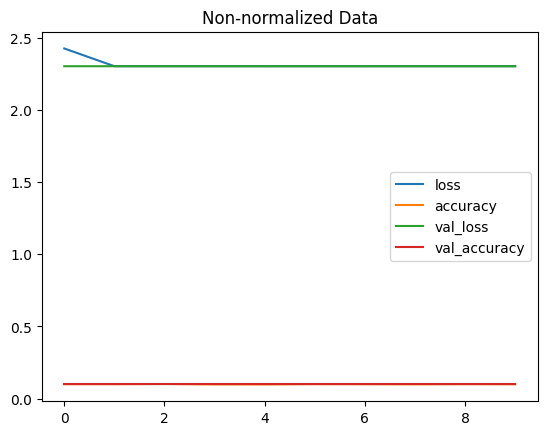

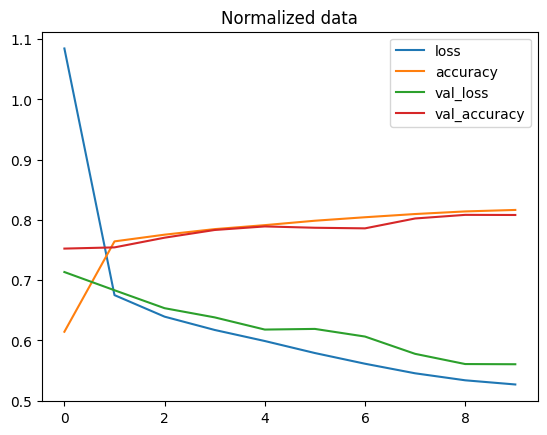

In [52]:
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized Data')
pd.DataFrame(norm_history.history).plot(title='Normalized data')

In [53]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data_scaled,
                                train_labels,
                                epochs=40,
                                validation_data=(test_data_scaled,test_labels),
                                callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1955 - accuracy: 0.5863 - val_loss: 0.8981 - val_accuracy: 0.6956 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8012 - accuracy: 0.7326 - val_loss: 0.7735 - val_accuracy: 0.7408 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6822 - accuracy: 0.7632 - val_loss: 0.6689 - val_accuracy: 0.7643 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6277 - accuracy: 0.7733 - val_loss: 0.6356 - val_accuracy: 0.7710 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6051 - accuracy: 0.7782 - val_loss: 0.6200 - val_accuracy: 0.7743 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5915 - accuracy: 0.7822 - val_loss: 0.6584 - val_accuracy: 0.7599 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

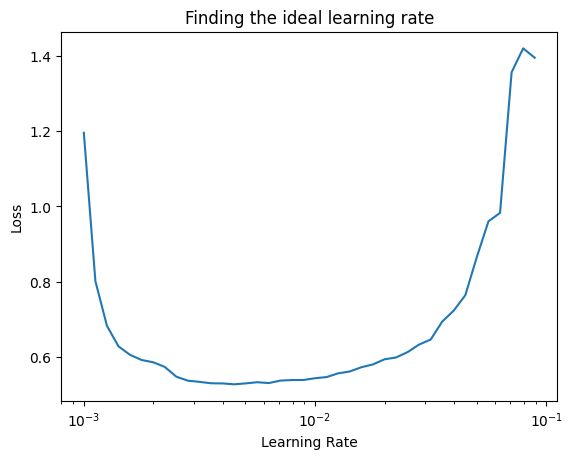

In [54]:
lrs = 1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs,find_lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

In [55]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr=0.001),
                 metrics=['accuracy'])

find_lr_history = model_14.fit(train_data_scaled,
                                train_labels,
                                epochs=20,
                                validation_data=(test_data_scaled,test_labels)
)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1113 - accuracy: 0.5551 - val_loss: 0.7498 - val_accuracy: 0.7094
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7026 - accuracy: 0.7152 - val_loss: 0.7053 - val_accuracy: 0.7138
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6568 - accuracy: 0.7376 - val_loss: 0.6518 - val_accuracy: 0.7573
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6097 - accuracy: 0.7827 - val_loss: 0.6188 - val_accuracy: 0.7831
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5881 - accuracy: 0.7936 - val_loss: 0.6026 - val_accuracy: 0.7887
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5739 - accuracy: 0.8008 - val_loss: 0.5921 - val_accuracy: 0.7940
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5651 - accuracy: 0.8035 - val_loss: 0.6187 - val_accuracy:

In [56]:
y_probs = model_14.predict(test_data_scaled)

313/313 [==============================] - 1s 1ms/step


In [57]:
y_probs.shape

(10000, 10)

In [58]:
y_probs[9999].argmax()   #y_probs returns the probabilities for 10 items and we choose the highest prob

5

In [59]:
class_names[y_probs[0].argmax()]

'Ankle boot'

In [60]:
y_preds = y_probs.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 8, 1, 5])

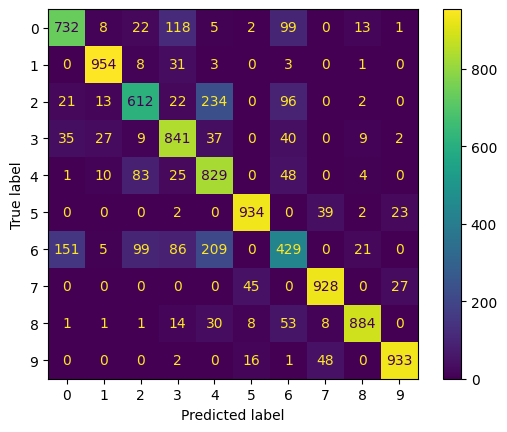

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

confusion_matrix(test_labels, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_labels, y_preds))
disp.plot()

In [62]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

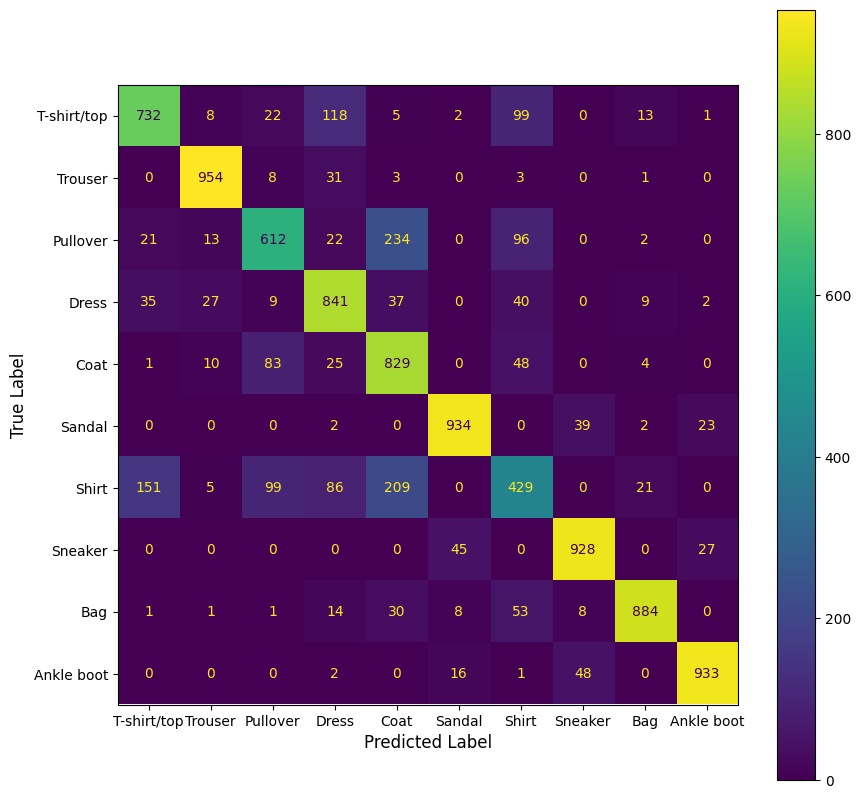

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_preds)

# Create the ConfusionMatrixDisplay object with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)

# Set labels for x and y axes
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Show the plot
plt.show()



In [64]:
import random

def plot_random_images(model, image, true_labels, classes):

  i = random.randint(0, len(image))

  target_image = image[i]
  pred_probs = model.predict(tf.reshape(target_image, (1, 28, 28)))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel(f'Pred : {pred_label}--{100*tf.reduce_max(pred_probs):2.0f}% True : {true_label}', color=color)


1/1 [==============================] - 0s 115ms/step


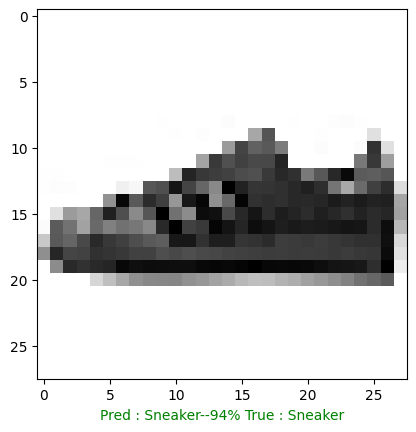

In [65]:
plot_random_images(model_11, test_data_scaled, test_labels, class_names)

In [66]:
model_14.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 4)                 3140      
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model_14.layers

In [68]:
model_14.layers[1]

In [69]:
weights, biases = model_14.layers[1].get_weights()

In [70]:
weights.shape

(784, 4)

In [71]:
biases

array([2.3046906 , 0.82650197, 2.078231  , 0.7374064 ], dtype=float32)

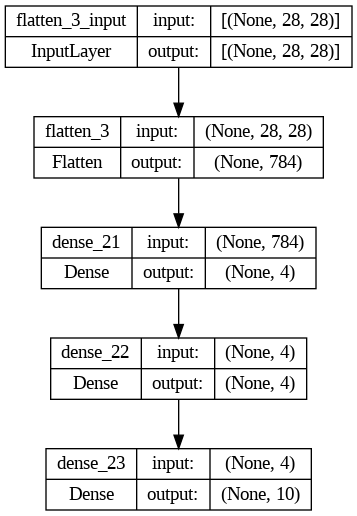

In [72]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)